In [2]:
import pandas as pd

tomatoes_dataframe = pd.read_csv("data/FAOSTAT_data_11-30-2020_production.csv")
area_year_production_tomatoes = tomatoes_dataframe[["Area", "Year", "Value"]]

<AxesSubplot:xlabel='Area'>

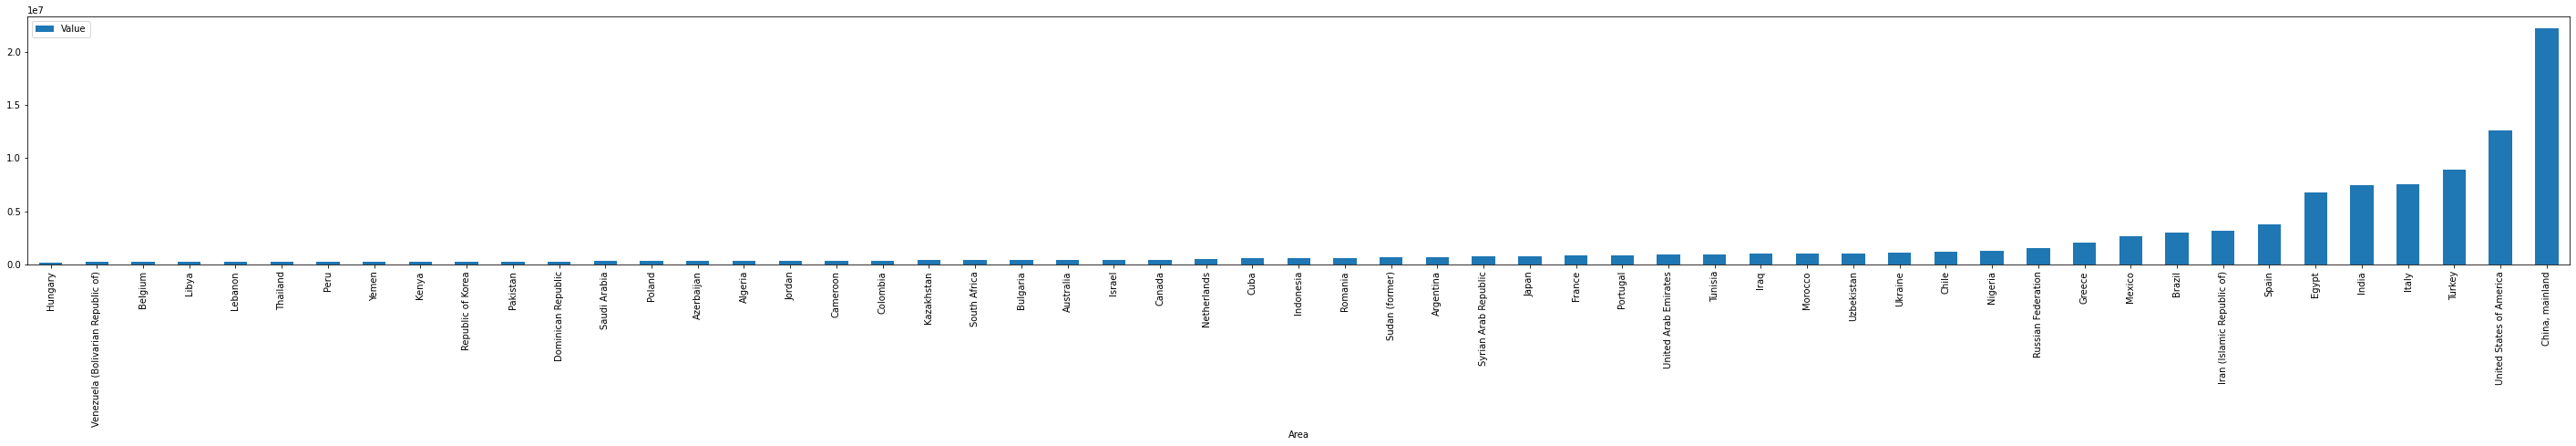

In [3]:
# tomatoes production in 2000 where production greater than 200 000
import matplotlib.pyplot as plt

area_year_production_tomatoes_2000 = area_year_production_tomatoes[(area_year_production_tomatoes["Year"] == 2000) & (area_year_production_tomatoes["Value"] > 200000)].sort_values(by="Value") 
area_year_production_tomatoes_2000.plot.bar(figsize=(50,5), x="Area", y="Value")


In [71]:
# get 20 bigger producters, aggregate others
selected_count = 20
area_production_tomatoes = tomatoes_dataframe[["Area", "Value"]]
year_production_tomatoes_by_area = area_production_tomatoes.groupby('Area')
year_production_tomatoes_by_area_by_production_sum = year_production_tomatoes_by_area.sum('Value').sort_values(by="Value", ascending=False)
year_production_tomatoes_biggest = year_production_tomatoes_by_area_by_production_sum.head(selected_count)

# by threshold
threshold = year_production_tomatoes_by_area_by_production_sum['Value'][selected_count - 1]
m = year_production_tomatoes_by_area_by_production_sum['Value'] < threshold
year_production_tomatoes_biggest_and_others = year_production_tomatoes_by_area_by_production_sum[~m].copy()
year_production_tomatoes_biggest_and_others.loc['Others'] = year_production_tomatoes_by_area_by_production_sum.loc[m, 'Value'].sum()


year_production_tomatoes_biggest_and_others

,Value
Area,
"China, mainland",1.063640e+09
United States of America,5.628199e+08
Turkey,3.544968e+08
India,3.411858e+08
Italy,2.941543e+08
Egypt,2.651737e+08
USSR,1.772195e+08
Spain,1.712192e+08
Iran (Islamic Republic of),1.369651e+08


In [72]:
# create dataFrame with x bigger producter and aggregate others, keeping years
biggest_name = year_production_tomatoes_biggest.index
biggest_year_production_tomatoes = area_year_production_tomatoes[area_year_production_tomatoes['Area'].isin(biggest_name)]

not_biggest_year_production_tomatoes = area_year_production_tomatoes[~area_year_production_tomatoes['Area'].isin(biggest_name)]
aggregate_not_biggest_year_production_tomatoes = not_biggest_year_production_tomatoes.groupby('Year').sum('Value')
aggregate_not_biggest_year_production_tomatoes['Area'] = 'Others'
aggregate_not_biggest_year_production_tomatoes['Year'] = aggregate_not_biggest_year_production_tomatoes.index

biggest_and_other_by_year = biggest_year_production_tomatoes.append(aggregate_not_biggest_year_production_tomatoes, ignore_index=True)


<AxesSubplot:title={'center':'Tomatoes production by year'}, xlabel='Year'>

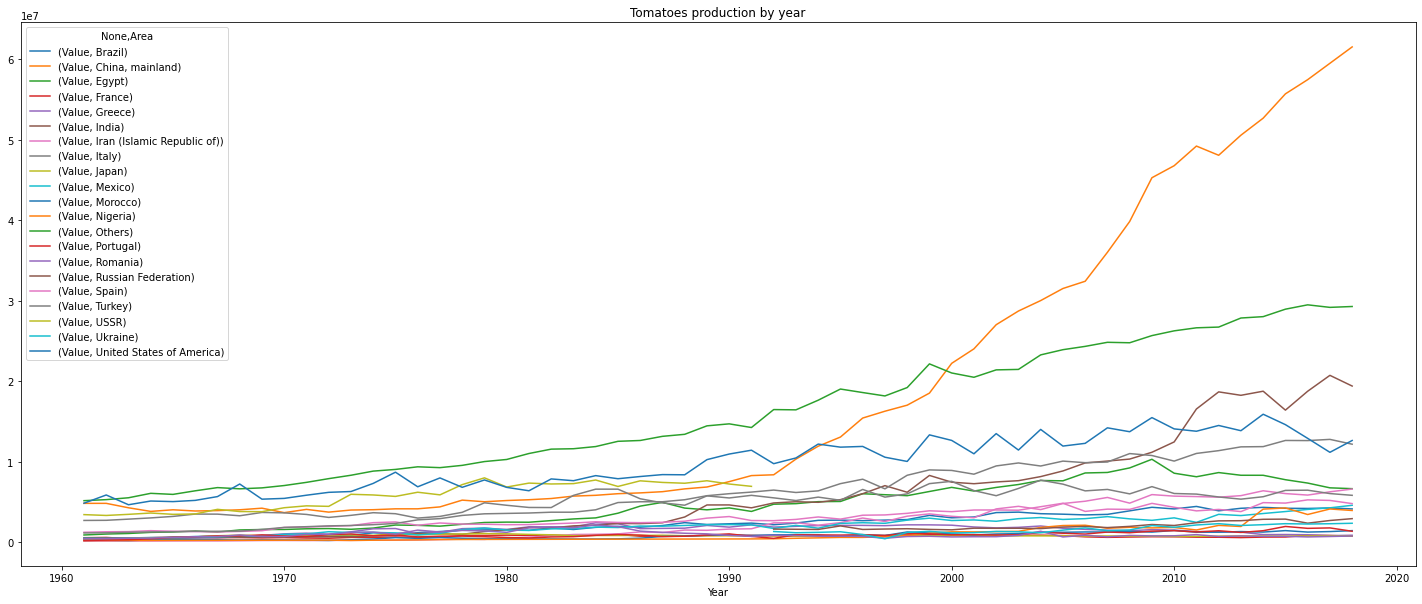

In [74]:

# tomatoes production in function of year for best in lines + others
year_production_tomatoes_by_area = biggest_and_other_by_year.pivot(index='Year', columns='Area')

fig, ax = plt.subplots()
fig.set_size_inches((25,10))
ax.set_axis_on()
ax.set_title('Tomatoes production by year')
ax.legend('best')
year_production_tomatoes_by_area.plot(kind='line', ax=ax)


<AxesSubplot:title={'center':'Tomatoes production by year'}, xlabel='Year', ylabel='Tomatoes production'>

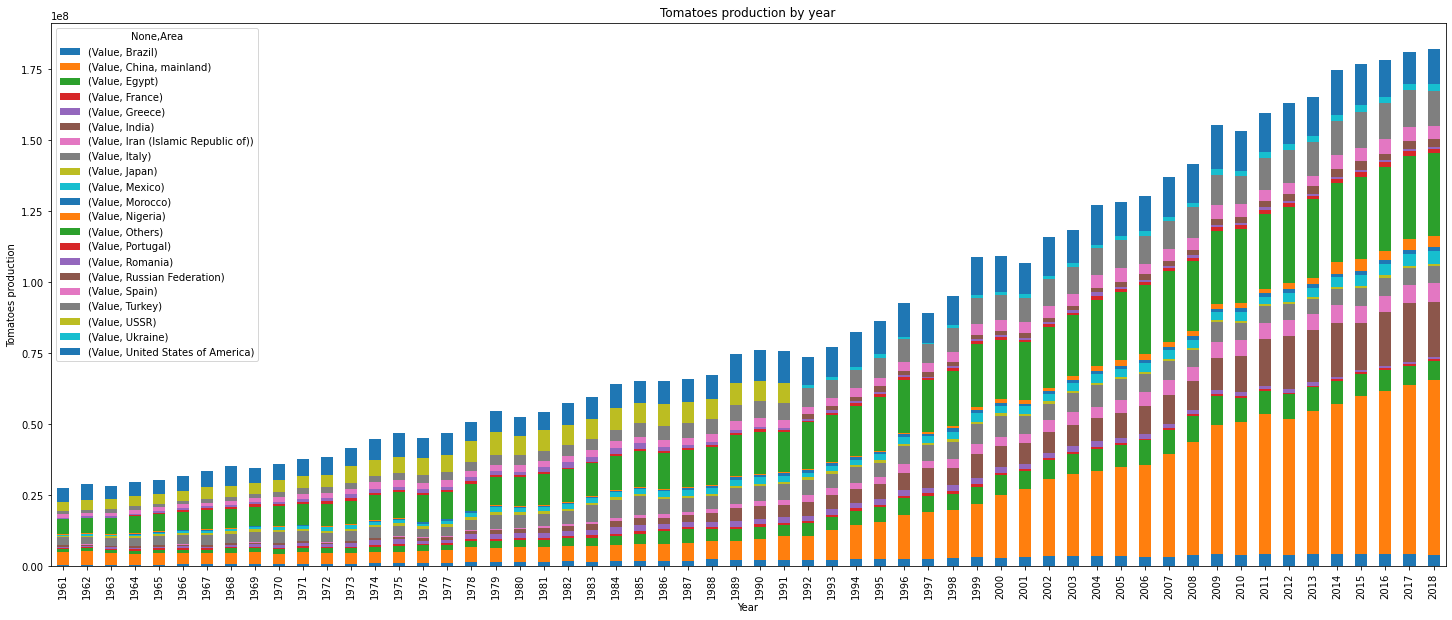

In [77]:

# same with stacked bar
fig, ax = plt.subplots()
fig.set_size_inches((25,10))
ax.set_ylabel('Tomatoes production')
ax.set_title('Tomatoes production by year')
year_production_tomatoes_by_area.plot(kind='bar', stacked=True, ax=ax)